In [28]:
import cv2
from cv2 import aruco
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import glob

sys.path.append('../')
import charuco

In [4]:
dir_realsense = '../../captures/210430/realsense/cap1/'
dir_kinect = '../../captures/210430/kinect/cap1/'

img_realsense = dir_realsense + 'image_1-%d.png'
img_kinect = dir_kinect + 'kinect_rgb_1-%d.png'

In [29]:
ar = charuco.Arco()
img_board = ar.img_aruco()

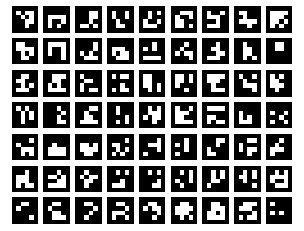

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(img_board, cmap = mpl.cm.gray)
ax.axis("off")
plt.show()

In [11]:
def read_chessboards(images):
    """
    Charuco base pose estimation.
    """
    print("POSE ESTIMATION STARTS:")
    allCorners = []
    allIds = []
    decimator = 0
    # SUB PIXEL CORNER DETECTION CRITERION
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)

    for im in images:
        print("=> Processing image {0}".format(im))
        frame = cv2.imread(im)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict)

        if len(corners)>0:
            # SUB PIXEL DETECTION
            for corner in corners:
                cv2.cornerSubPix(gray, corner,
                                 winSize = (3,3),
                                 zeroZone = (-1,-1),
                                 criteria = criteria)
            res2 = cv2.aruco.interpolateCornersCharuco(corners,ids,gray,board)
            if res2[1] is not None and res2[2] is not None and len(res2[1])>3 and decimator%1==0:
                allCorners.append(res2[1])
                allIds.append(res2[2])

        decimator+=1

    imsize = gray.shape
    return allCorners,allIds,imsize

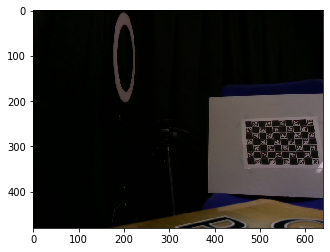

In [16]:
file_img = img_realsense%1
img = cv2.imread(file_img)

fig = plt.figure()
plt.imshow(img)
plt.show()

In [18]:
images = [file_img]
allCorners,allIds,imsize=read_chessboards(images)

POSE ESTIMATION STARTS:
=> Processing image ../../captures/210430/realsense/cap1/image_1-1.png


In [21]:
imsize

(480, 640)